In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

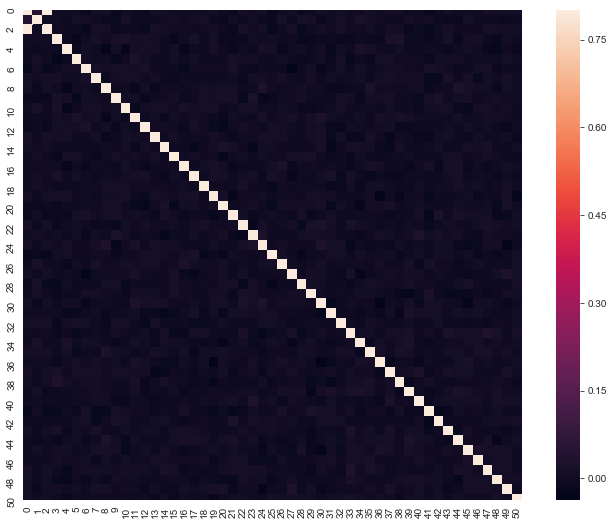

In [2]:
n = 10000
p = 50
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 25 * X[:, 1] + np.random.normal(size=n * 1) + 50

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.998417926035348
R-squared PLSR: 0.9984179260343666


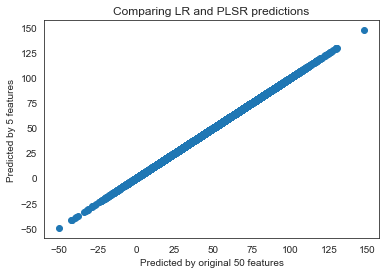

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

pls1 = PLSRegression(n_components=5)
pls1.fit(X, y)
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 50 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR2: 0.9956734469575195


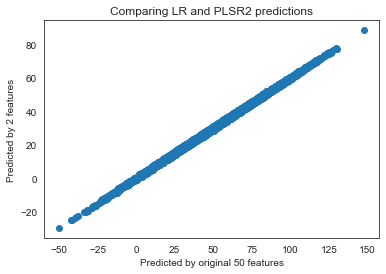

In [4]:
y2 = X[:, 0] + 15 * X[:, 1] + np.random.normal(size=n * 1) + 30
pls2 = PLSRegression(n_components=2)
pls2.fit(X, y2)
y_pls_pred = pls2.predict(X)
print('R-squared PLSR2:', pls2.score(X, y2))

plt.scatter(Y_pred, y_pls_pred) 
plt.xlabel('Predicted by original 50 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR2 predictions')
plt.show()

R-squared PLSR3: 0.9993674236940582


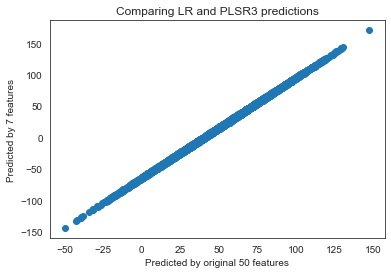

In [5]:
y3 = X[:, 0] + 40 * X[:, 1] + np.random.normal(size=n * 1) + 15
pls3 = PLSRegression(n_components=7)
pls3.fit(X, y3)
y_pls_pred3 = pls3.predict(X)
print('R-squared PLSR3:', pls3.score(X, y3))

plt.scatter(Y_pred, y_pls_pred3) 
plt.xlabel('Predicted by original 50 features')
plt.ylabel('Predicted by 7 features')
plt.title('Comparing LR and PLSR3 predictions')
plt.show()